In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load Data

In [3]:
#import data
file_path = "building_permits.csv"
df = pd.read_csv(file_path)


/var/folders/9l/bl1wkl2j78726pz7sf5wytdr0000gn/T/ipykernel_10115/697357070.py:3: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Data inspection

Lets now analyse the data we are dealing with

In [4]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [5]:
df.shape

(198900, 43)

In [6]:
df.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [7]:
# Checking for duplicates. Looks like all good
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]
print(f"Number of Duplicate Rows: {num_duplicates}")

Number of Duplicate Rows: 0


In [8]:
columns = df.columns
for col in columns:
  print(f"Number of distinct values for '{col}' is {df[col].nunique()}")

Number of distinct values for 'Permit Number' is 181495
Number of distinct values for 'Permit Type' is 8
Number of distinct values for 'Permit Type Definition' is 8
Number of distinct values for 'Permit Creation Date' is 1291
Number of distinct values for 'Block' is 4896
Number of distinct values for 'Lot' is 1055
Number of distinct values for 'Street Number' is 5099
Number of distinct values for 'Street Number Suffix' is 18
Number of distinct values for 'Street Name' is 1704
Number of distinct values for 'Street Suffix' is 21
Number of distinct values for 'Unit' is 660
Number of distinct values for 'Unit Suffix' is 164
Number of distinct values for 'Description' is 134272
Number of distinct values for 'Current Status' is 14
Number of distinct values for 'Current Status Date' is 1307
Number of distinct values for 'Filed Date' is 1288
Number of distinct values for 'Issued Date' is 1289
Number of distinct values for 'Completed Date' is 1300
Number of distinct values for 'First Constructi

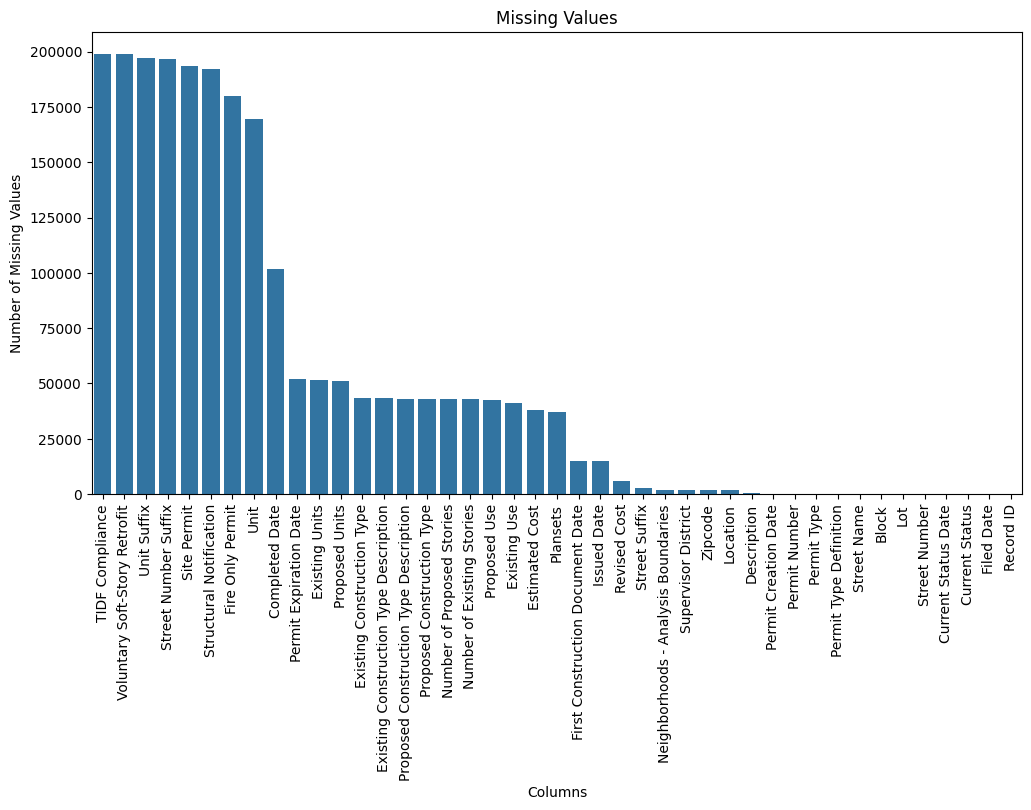

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

#### Lets evaluate the completness of our dataset

In [10]:
#total number of cells
TOT = df.shape[0]*df.shape[1]
#total number of not null values
NOT_NULL = df.count().sum()

In [11]:
COMPLETENESS = NOT_NULL / TOT
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

73.7%


### Data Cleaning


In [59]:
#Lets check if the Permit Types ar consistent with the permit type definition
permit_type_definitions = df.groupby('Permit Type')['Permit Type Definition'].unique()

# Check if there are multiple unique definitions for any permit type
inconsistent_types = {}
for permit_type, definitions in permit_type_definitions.items():
    if len(definitions) > 1:
        inconsistent_types[permit_type] = definitions

# Print the results
if inconsistent_types:
    print("Permit Types with Multiple Definitions:")
    for permit_type, definitions in inconsistent_types.items():
        print(f"\nPermit Type: {permit_type}")
        print("Definitions:")
        for definition in definitions:
            print(f"- {definition}")
else:
    print("All permit types have consistent definitions.")

All permit types have consistent definitions.


In [12]:
# Convert to datetime format
date_columns = ['Permit Creation Date', 'Current Status Date', 'Filed Date', 'Issued Date',
                 'Completed Date', 'First Construction Document Date', 'Permit Expiration Date']
df[date_columns] = df[date_columns].astype('datetime64[ns]')

In [13]:
# Create a new column 
# df['Days_to_Issue'] = (df['Issued Date'] - df['Filed Date']).dt.days

In [14]:
# In uploading file we saw an error for columns 22 and 32. Moreover, they are completely empty or they only have one value
# which does not add any information to the dataset. Let's get rid of them 

columns_to_drop = ['TIDF Compliance', 'Voluntary Soft-Story Retrofit']
df.drop(columns=columns_to_drop, inplace=True)

In [15]:
#For the same permit number we have multiple instances

permit_nums = df['Permit Number'].value_counts()
permit_nums

Permit Number
201602179765    101
201602179758     66
201602179775     30
201702239990      9
201708165004      9
               ... 
M842987           1
M843007           1
M843807           1
M845227           1
201802232143      1
Name: count, Length: 181495, dtype: int64

Lets analyze one single permit number and understand what are the differences between the samples

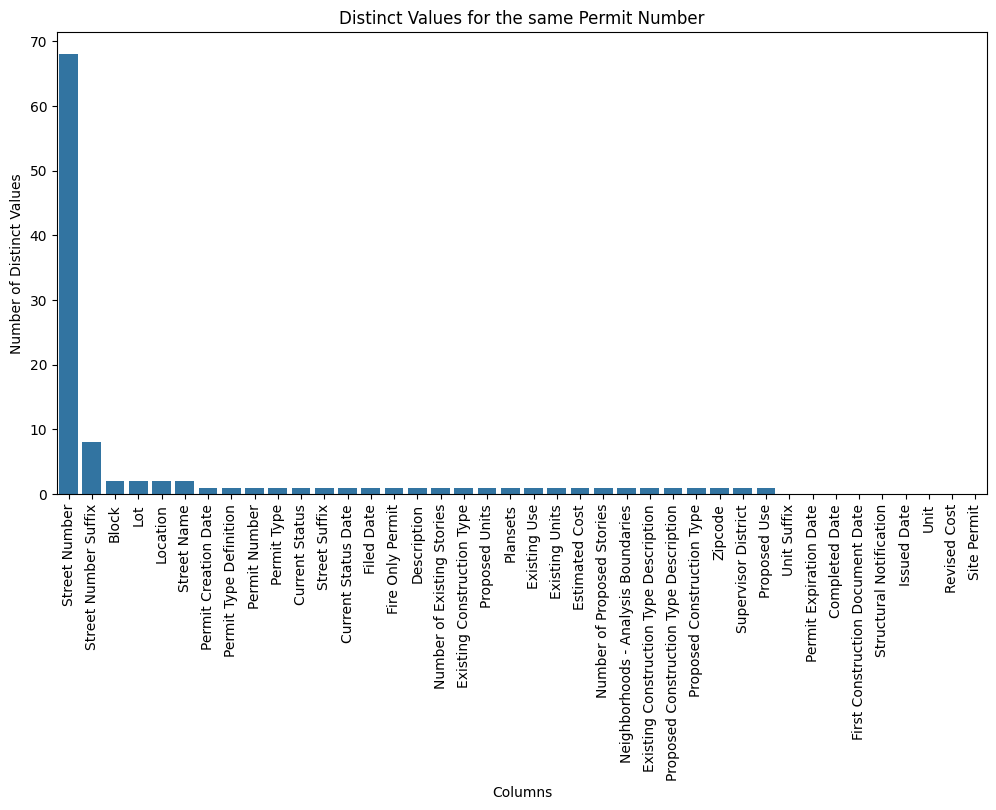

In [16]:
#Creating a dataframe with a single permit number 
permits = pd.DataFrame(df[df['Permit Number'] == '201602179765'])
columns = permits.columns


#removing Record ID column which is unique
permits.drop(columns='Record ID', inplace=True)
#Plotting the number of distinct values for each feature
distinct_values = permits.nunique().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=distinct_values.index, y=distinct_values.values)
plt.xticks(rotation=90)
plt.title('Distinct Values for the same Permit Number')
plt.xlabel('Columns')
plt.ylabel('Number of Distinct Values')
plt.show()


We realize that the only differences are in the location (e.g. street, block, lot) so we assumed that this is not an error but these permits cuold be related to different buildings inside the same condominium.

### Handling missing values

In [17]:
# Columns have only 'Y' = 'Yes' option. Let's transform it to boolean format and get rid of the nulls replacing them with False

df['Fire Only Permit'] = df['Fire Only Permit'].map({'Y': True, np.nan: False})
df['Structural Notification'] = df['Structural Notification'].map({'Y': True, np.nan: False})
df['Site Permit'] = df['Site Permit'].map({'Y': True, np.nan: False})

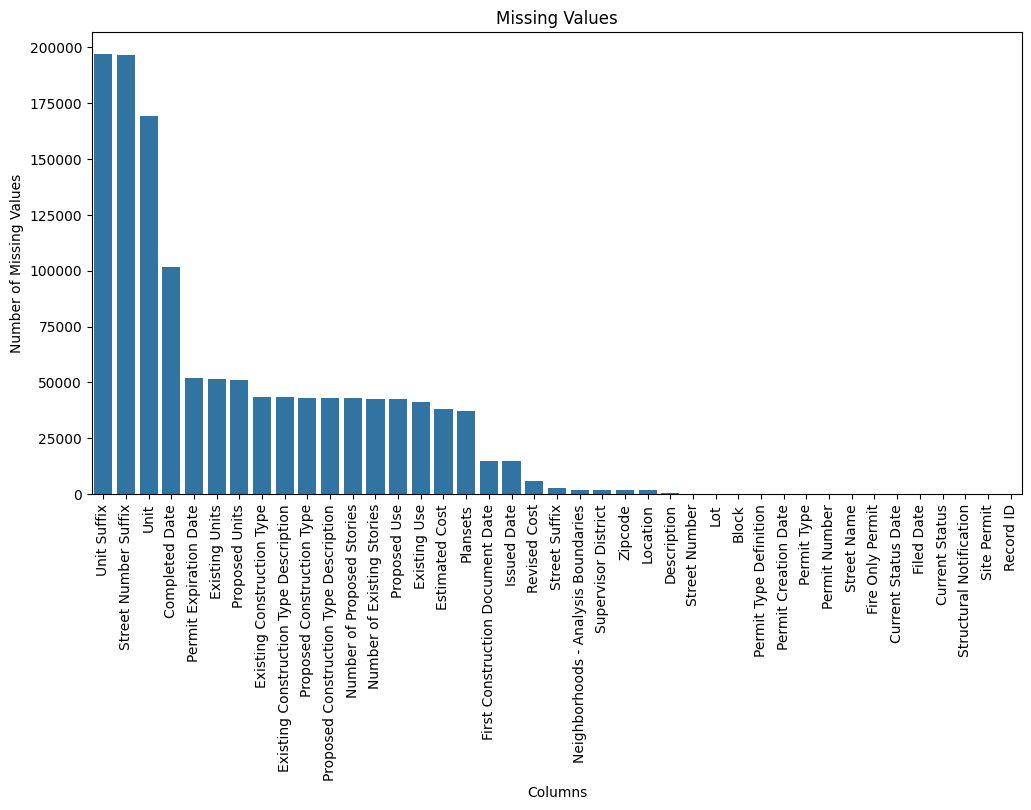

In [18]:
#Lets now print agian the number of missing values per feature

missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

#### Completed date

In [19]:
print(f"Number of missing values for 'Completed Date' is: {df['Completed Date'].isnull().sum()}")

Number of missing values for 'Completed Date' is: 101709


'Completed date' has a relatively high number of missing values lets see if these are legit e.g if Current Status != “Complete” 

In [20]:
completed_permits = pd.DataFrame({
    'Current Status': df['Current Status'],
    'Completed Date': df['Completed Date']
})

In [21]:
completed_permits['Current Status'].unique()

array(['expired', 'issued', 'withdrawn', 'complete', 'filed', 'approved',
       'reinstated', 'cancelled', 'appeal', 'suspend', 'revoked',
       'plancheck', 'disapproved', 'incomplete'], dtype=object)

In [22]:
# Define the statuses that require a 'Completed Date'
statuses_requiring_completed_date = ['complete']

# Filter rows with null 'Completed Date' and where 'Current Status' is in the given list
invalid_rows = completed_permits[
    (completed_permits['Completed Date'].isna()) & 
    (completed_permits['Current Status'].isin(statuses_requiring_completed_date))
]

print(f'Number of invalid rows: {invalid_rows.shape[0]}')

Number of invalid rows: 0


In [23]:
#Lets now see if actually only the 'complete' permits have the completion date 
statuses = ['expired', 'issued', 'withdrawn', 'filed', 'approved','reinstated', 'cancelled', 'appeal', 'suspend', 'revoked', 'plancheck', 'disapproved', 'incomplete']

# Filter rows with null 'Completed Date' and where 'Current Status' is in the given list
for status in statuses:
    invalid_rows = completed_permits[
        (completed_permits['Completed Date'].notnull()) & 
        (completed_permits['Current Status'] == status)
    ]
    print(f"Number of not null 'Completed date' for '{status}' status is: {invalid_rows.shape[0]}")

Number of not null 'Completed date' for 'expired' status is: 7
Number of not null 'Completed date' for 'issued' status is: 53
Number of not null 'Completed date' for 'withdrawn' status is: 0
Number of not null 'Completed date' for 'filed' status is: 0
Number of not null 'Completed date' for 'approved' status is: 5
Number of not null 'Completed date' for 'reinstated' status is: 36
Number of not null 'Completed date' for 'cancelled' status is: 5
Number of not null 'Completed date' for 'appeal' status is: 0
Number of not null 'Completed date' for 'suspend' status is: 3
Number of not null 'Completed date' for 'revoked' status is: 4
Number of not null 'Completed date' for 'plancheck' status is: 0
Number of not null 'Completed date' for 'disapproved' status is: 0
Number of not null 'Completed date' for 'incomplete' status is: 1


Clearly there are some errors. Having a completed date doesn't make sense for permits that are not completed yet (e.g. issued status). Therefore, we are going to proceed by deleating these values.  

In [24]:
for status in statuses:
    df.loc[
        (df['Completed Date'].notnull()) & (df['Current Status'] == status), 
        'Completed Date'
    ] = np.nan
    


#### Permit expiration date

In [25]:
df['Permit Expiration Date'].isnull().sum()

51880

In [26]:
expiration_permits = pd.DataFrame({
    'Current Status': df['Current Status'],
    'Permit Expiration Date': df['Completed Date']
})

In [27]:
completed_permits['Current Status'].unique()

array(['expired', 'issued', 'withdrawn', 'complete', 'filed', 'approved',
       'reinstated', 'cancelled', 'appeal', 'suspend', 'revoked',
       'plancheck', 'disapproved', 'incomplete'], dtype=object)

Expiration date is related to issued permit. Therefore, all permits that are in a status previous to the 'issuing' stage cannot have an expiration date. Here's a typical sequential order based on how permits are commonly processed:
1. Filed: The permit application has been submitted to the relevant authority.
2. Incomplete: The application is reviewed, and if information is missing, the status is marked as incomplete.
3. Plancheck: The application is under review to ensure compliance with building codes and regulations.
4. Disapproved: The application does not meet the requirements and needs revision.
5. Approved: The application has been reviewed and meets all necessary standards.
6. Appeal: If there’s a dispute over the decision (e.g., disapproval), the applicant can appeal.
7. Issued: The permit has been granted, and construction can commence.
8. Reinstated: If a previously suspended or withdrawn permit is reactivated.
9. Suspend: The permit's activity is temporarily halted due to issues like non-compliance or pending information.
10. Revoked: The permit is permanently invalidated due to significant violations or changes in conditions.
11. Withdrawn: The applicant has chosen to withdraw the permit application.
12. Cancelled: The permit is nullified, typically by the issuing authority or applicant agreement.
13. Complete: All work and inspections are finished, and the project is officially closed.
14. Expired: The permit has exceeded its valid period without necessary action or completion.


In [28]:
#Lets see if there are any permits which should not have an expiration date but they do
statuses = ['filed', 'plancheck', 'incomplete', 'approved', 'disapproved', 'appeal']
# Filter rows with null 'Completed Date' and where 'Current Status' is in the given list
for status in statuses:
    invalid_rows = expiration_permits[
        (expiration_permits['Permit Expiration Date'].notnull()) & 
        (expiration_permits['Current Status'] == status)
    ]
    print(f"Number of not null 'Permit Expiration Date' for '{status}' status is: {invalid_rows.shape[0]}")

Number of not null 'Permit Expiration Date' for 'filed' status is: 0
Number of not null 'Permit Expiration Date' for 'plancheck' status is: 0
Number of not null 'Permit Expiration Date' for 'incomplete' status is: 0
Number of not null 'Permit Expiration Date' for 'approved' status is: 0
Number of not null 'Permit Expiration Date' for 'disapproved' status is: 0
Number of not null 'Permit Expiration Date' for 'appeal' status is: 0


In [29]:
#Lets see if there are any permits which must have an expiration date but they don't
statuses = ['issued', 'complete', 'reinstated']

# Filter rows with null 'Completed Date' and where 'Current Status' is in the given list
for status in statuses:
    invalid_rows = expiration_permits[
        (expiration_permits['Permit Expiration Date'].isna()) & 
        (expiration_permits['Current Status'] == status)
    ]
    print(f"Number of null 'Permit Expiration Date' for '{status}' status is: {invalid_rows.shape[0]}")

Number of null 'Permit Expiration Date' for 'issued' status is: 83559
Number of null 'Permit Expiration Date' for 'complete' status is: 0
Number of null 'Permit Expiration Date' for 'reinstated' status is: 563


#### Existing constuction type & Proposed constuction type (and description)
Lets see if there is correlation between these two

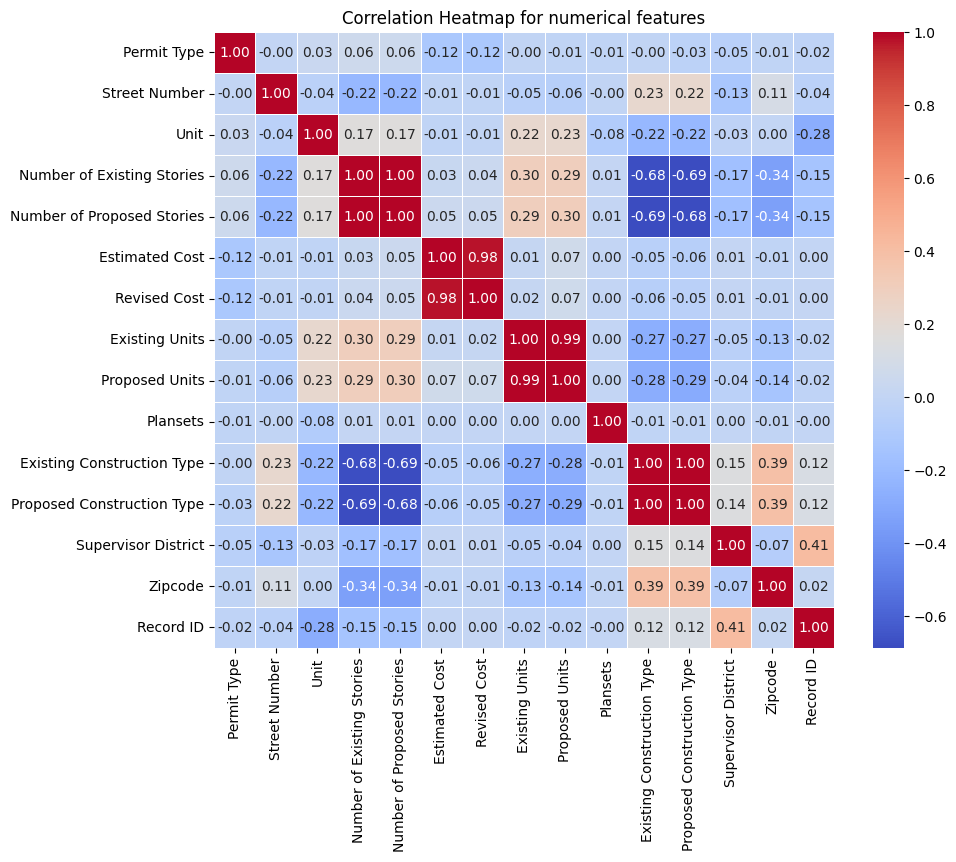

In [30]:
#display coorelation between numeric columns
NUM = list(df.select_dtypes(include=['int64','float64']).columns)
df[NUM].corr(method='pearson')


# Compute the correlation matrix for numeric columns using pearson coefficient
correlation_matrix = df[NUM].corr(method='pearson')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Heatmap for numerical features')
plt.show()

From this we can understand that the correlation between this two is 1, so they are basically the same. In fact, everytime both values are not null they are the same. So this missing values are legit and there is no need for further analysis.

In [31]:
construction_type = pd.DataFrame({
    'Existing Construction Type': df['Existing Construction Type'],
    'Proposed Construction Type': df['Proposed Construction Type']
})

construction_type.head()

,Existing Construction Type,Proposed Construction Type
0,3.0,NaN
1,3.0,NaN
2,1.0,1.0
3,5.0,5.0
4,3.0,NaN


In [32]:
# Lets check if everytime we have an Existing constuction type we also have the description
missing_description = (df['Existing Construction Type'].notnull()) & (df['Existing Construction Type Description'].isnull())

# Count rows where the condition is True
missing_count = missing_description.sum()

# Print result
print(f"Number of rows with 'Existing Construction Type' but no 'Description': {missing_count}")


Number of rows with 'Existing Construction Type' but no 'Description': 0


In [33]:
missing_description = (df['Proposed Construction Type'].notnull()) & (df['Proposed Construction Type Description'].isnull())

# Count rows where the condition is True
missing_count = missing_description.sum()

# Print result
print(f"Number of rows with 'Proposed Construction Type' but no 'Proposed Description': {missing_count}")


Number of rows with 'Proposed Construction Type' but no 'Proposed Description': 0


Lets check if for the same Types we have the same descriptions

In [34]:
# Group by 'Existing Construction Type' and check the number of unique descriptions
inconsistent_types = df.groupby('Existing Construction Type')['Existing Construction Type Description'].nunique()

# Filter types that have more than one unique description
inconsistent_types = inconsistent_types[inconsistent_types > 1]

# Display the results
if not inconsistent_types.empty:
    print("Inconsistent pairs found:")
    print(inconsistent_types)
else:
    print("Every 'Existing Construction Type' has a consistent 'Description'.")


Every 'Existing Construction Type' has a consistent 'Description'.


In [35]:
# Group by 'Existing Construction Type' and check the number of unique descriptions
inconsistent_types = df.groupby('Proposed Construction Type')['Proposed Construction Type Description'].nunique()

# Filter types that have more than one unique description
inconsistent_types = inconsistent_types[inconsistent_types > 1]

# Display the results
if not inconsistent_types.empty:
    print("Inconsistent pairs found:")
    print(inconsistent_types)
else:
    print("Every 'Proposed Construction Type' has a consistent 'Description'.")


Every 'Proposed Construction Type' has a consistent 'Description'.


#### Number of existing & proposed Stories
As seen in the previous section the correlation between these 2 features is one. Moreover, for some permit types this feature is not applicable    Therefore, we are going to proceed as we did for the previous features.

In [36]:
stories = pd.DataFrame({
    'Number of Existing Stories': df['Number of Existing Stories'],
    'Number of Proposed Stories': df['Number of Proposed Stories'],
    'Permit Type': df['Permit Type']
})



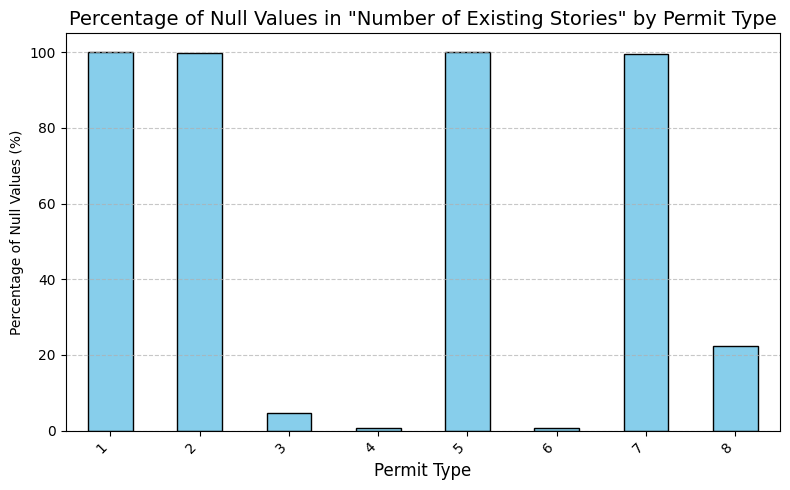

In [37]:
# Calculate null values and total permits for each permit type
null_counts = stories[stories['Number of Existing Stories'].isnull()] \
    .groupby('Permit Type') \
    .size()

total_counts = stories.groupby('Permit Type').size()

# Calculate the percentage of null values
percent_null = (null_counts / total_counts) * 100

# Plot the histogram
percent_null.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black')
plt.title('Percentage of Null Values in "Number of Existing Stories" by Permit Type', fontsize=14)
plt.xlabel('Permit Type', fontsize=12)
plt.ylabel('Percentage of Null Values (%)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Clearly permit types 1,2,5,7 this feature is not applicable so the null values are not a problem. For permit type 3/4/6 they are a very very small number so we can proceed deleting this rows.

In [38]:
df = df[
    ~(
        df['Permit Type'].isin([3, 4, 5]) &
        df['Number of Existing Stories'].isnull()
    )
]


In [52]:
df[df['Permit Type']==8].head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),False,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
5,201706149344,8,otc alterations permit,2017-06-14,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,False,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),False,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,2017-06-30,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,False,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,2017-07-05,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,False,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772


OTC (Over-The-Counter) Alteration permits are typically issued for minor modifications or repairs to existing buildings. These permits generally do not involve adding new stories or altering the number of existing ones.

As a result, buildings with an OTC Alteration permit are usually not undergoing significant structural changes, such as changes to their height or number of stories. Consequently, for some of these buildings, the concept of "story" may not be relevant, and any missing values in this context are reasonable and understandable. 